## Match Preview

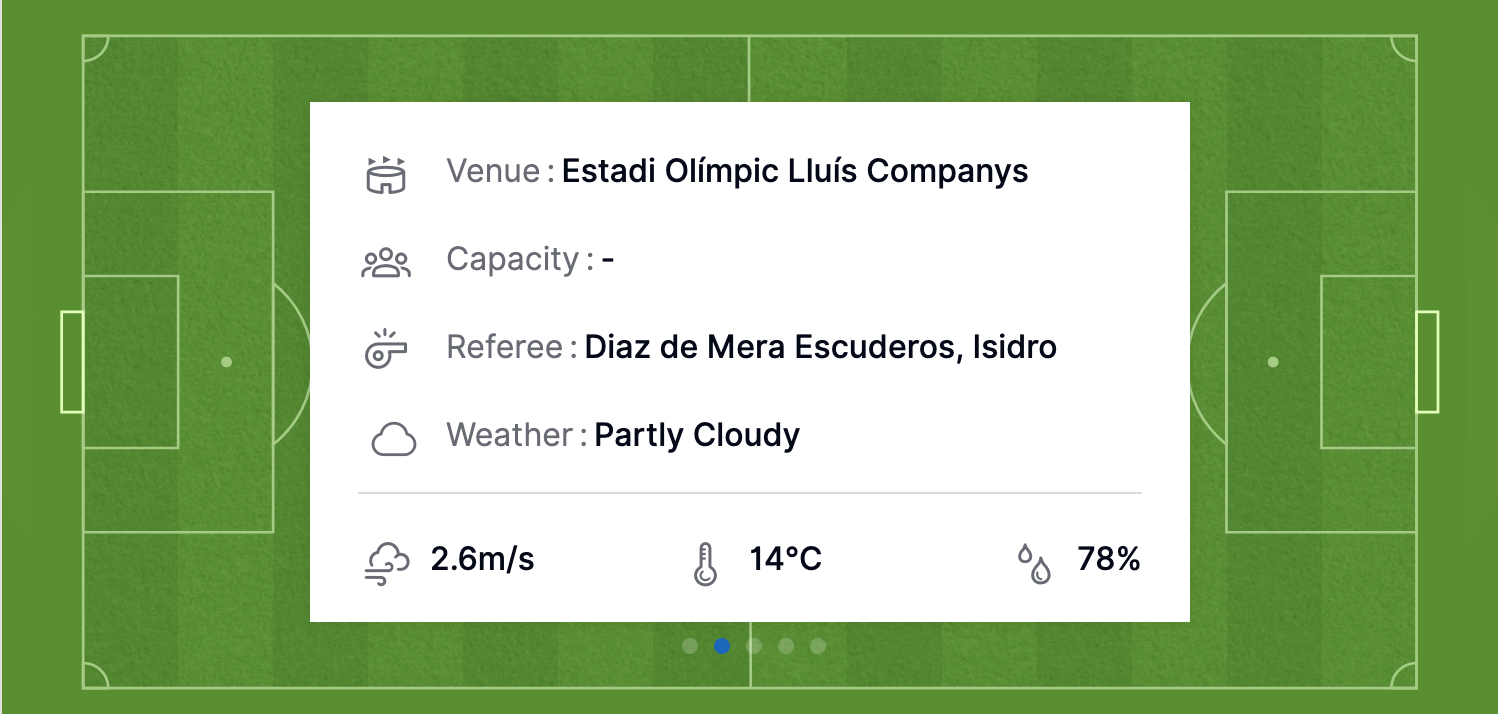

## Head 2 Head

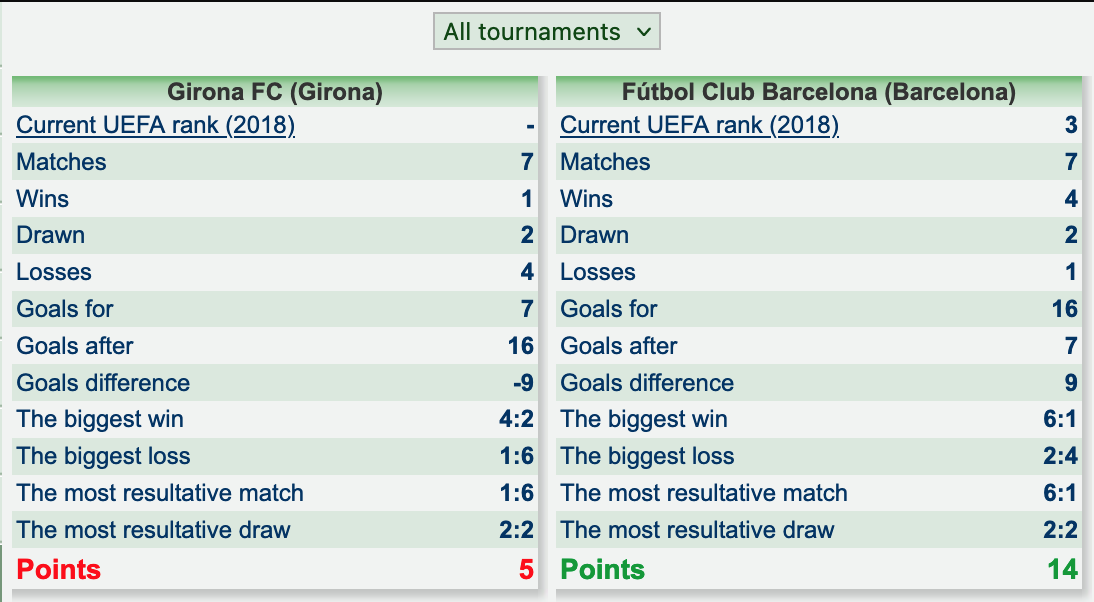

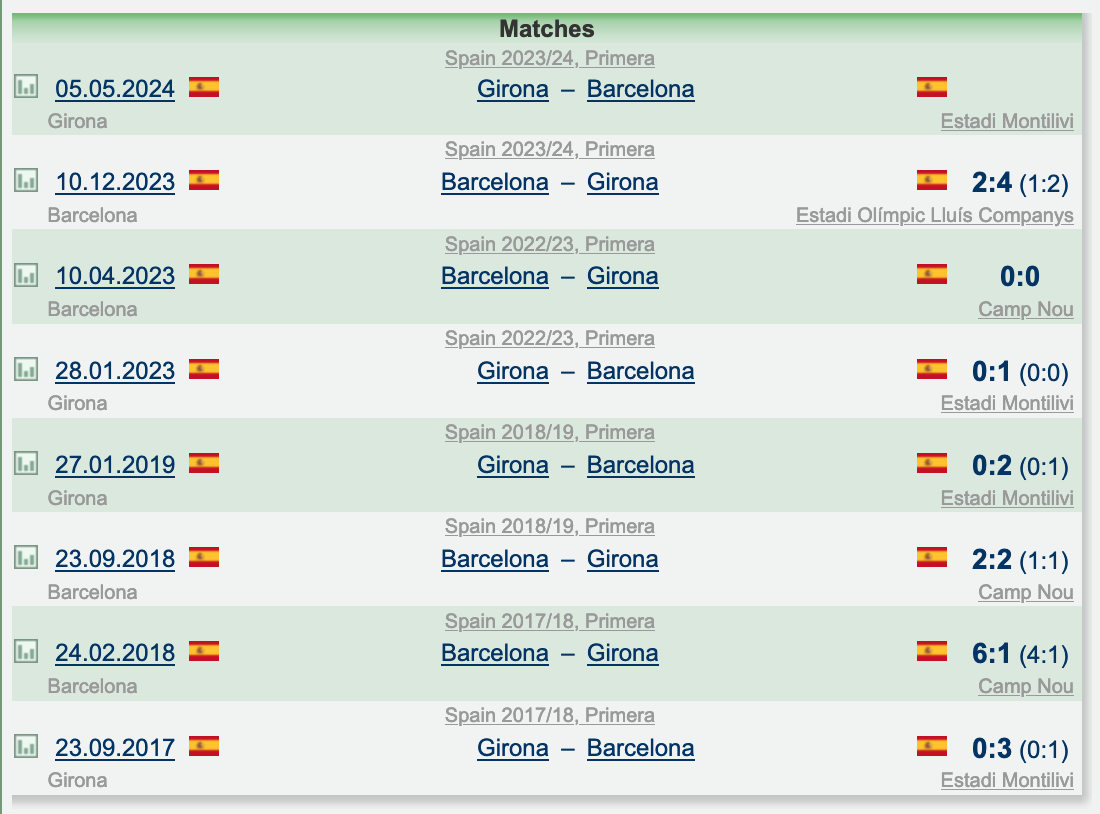

## Pre Match Odds

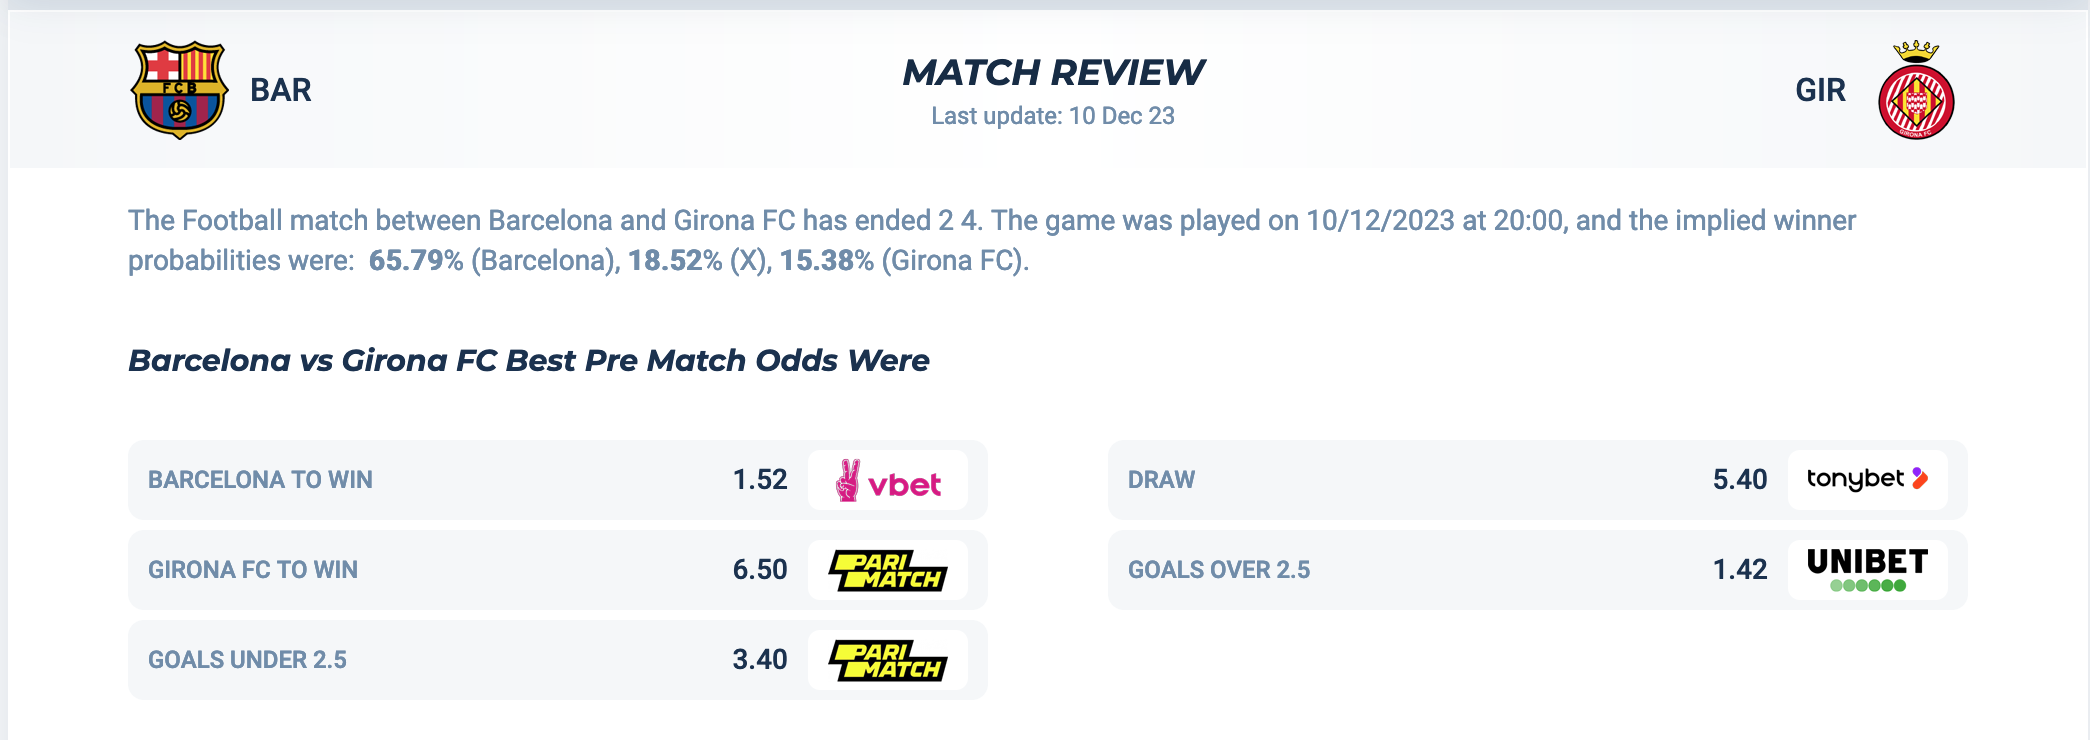

## Dovbyk Score

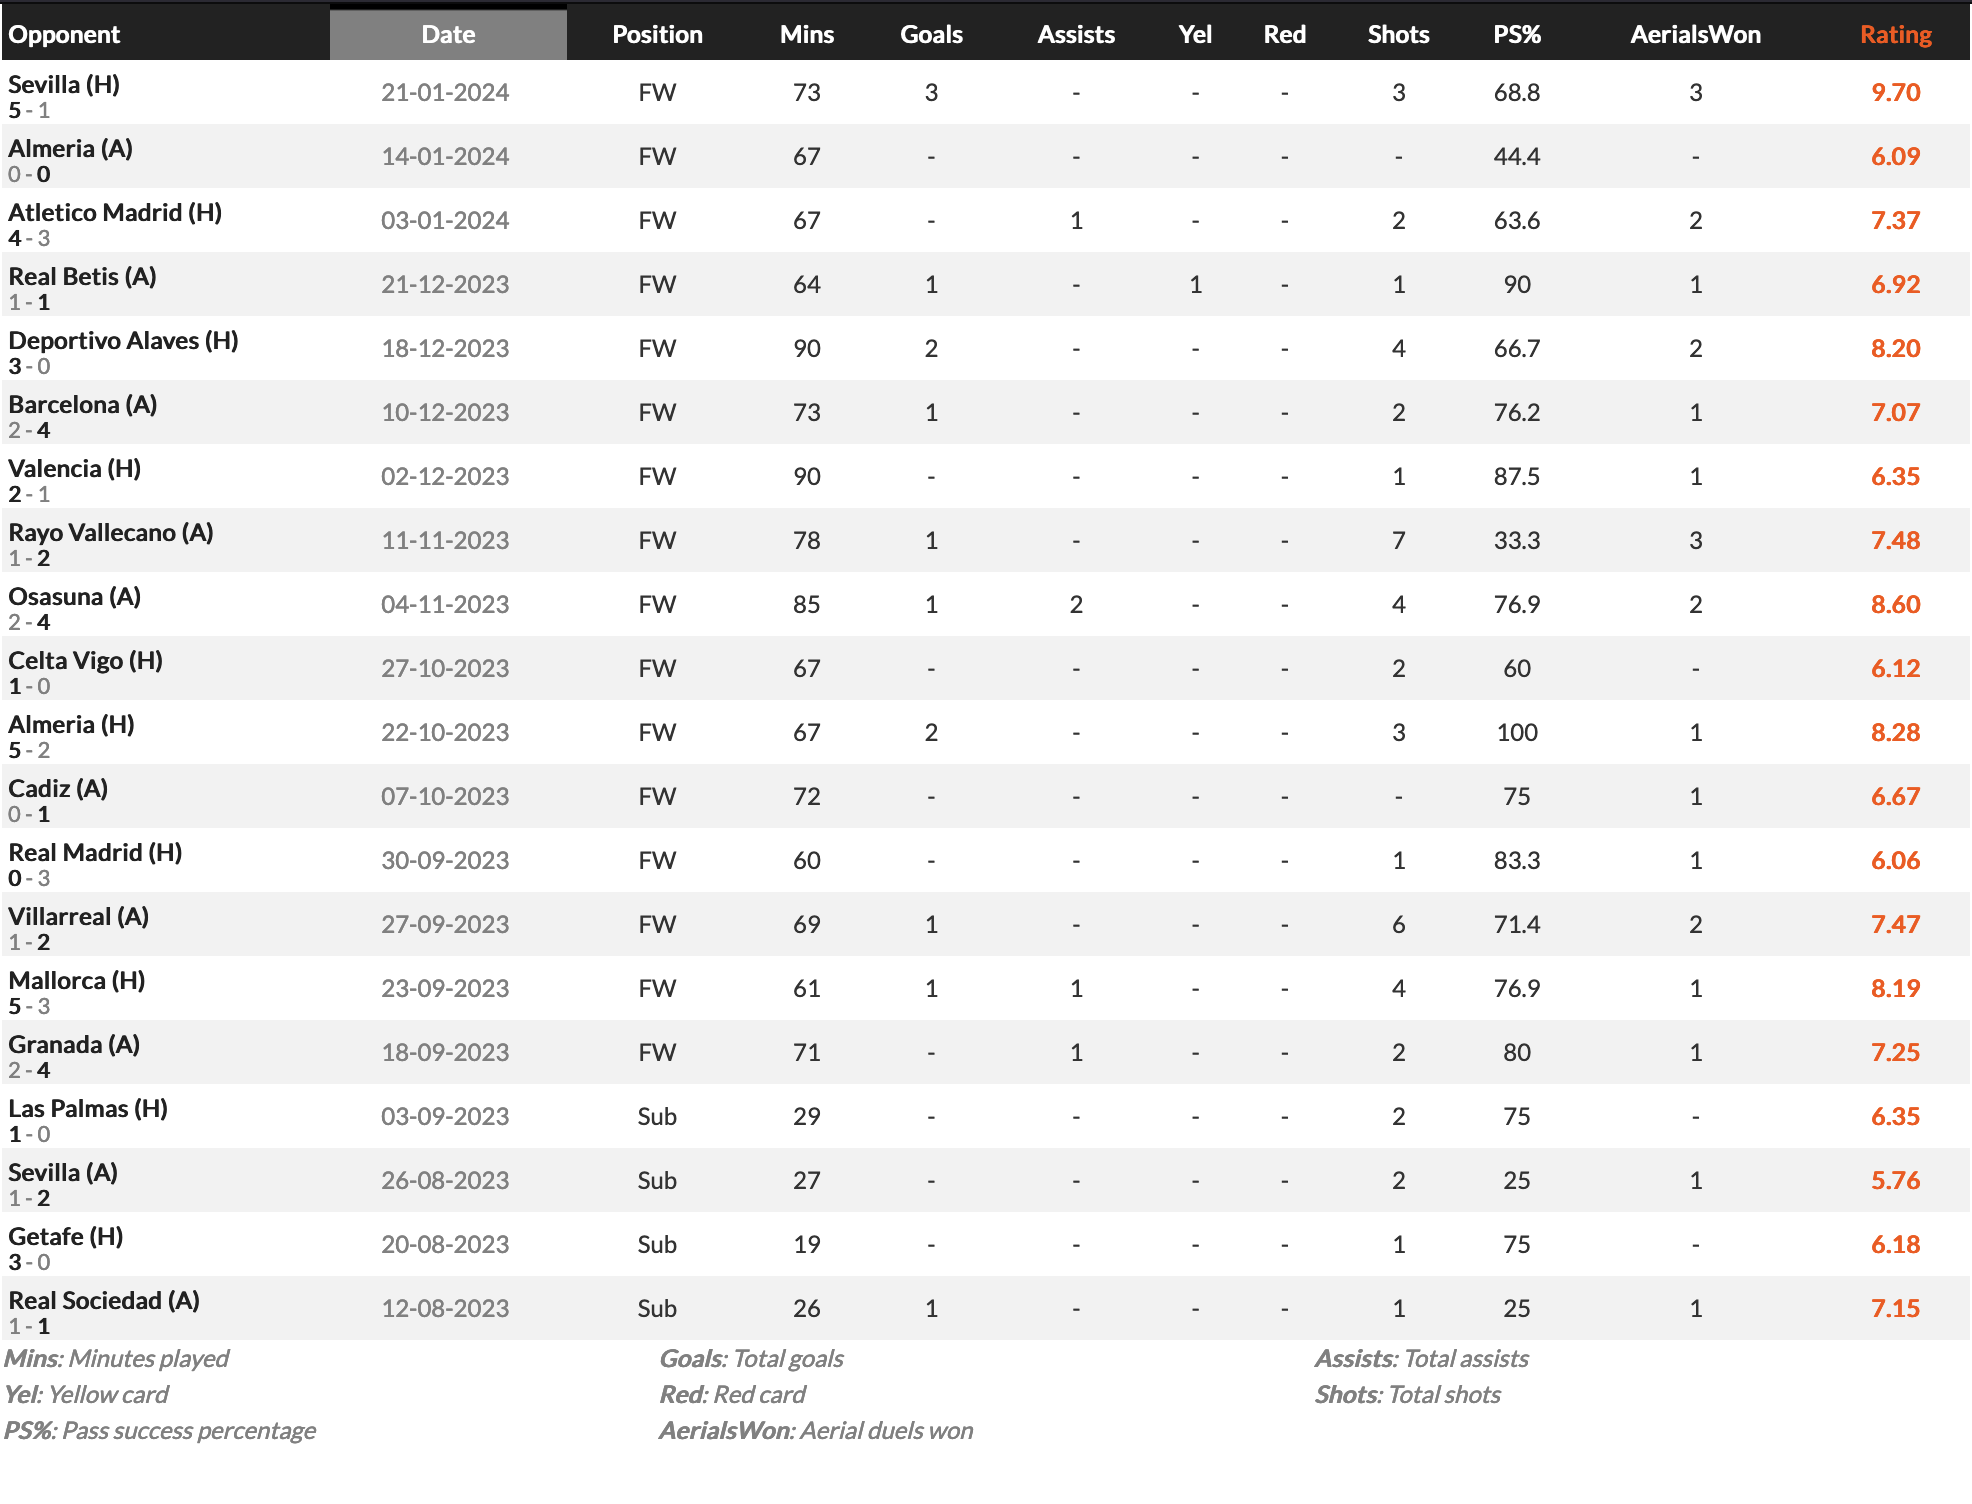